In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
import torch

In [12]:
N = torch.zeros((728, 27), dtype=torch.int32)

In [13]:
import string

# 获取所有字母
letters = string.ascii_lowercase

# 生成所有可能的两字符组合，包括 '.'+字母 和 字母+'.'
char_pairs = sorted(['.'+c for c in letters] + [c+'.' for c in letters] + 
                    [c1+c2 for c1 in letters for c2 in letters])

pairtoi = {pair: i for i, pair in enumerate(char_pairs)}
itopair = {i: pair for pair, i in pairtoi.items()}

# 打印 stoi 的前十个项
print("前三个 pairtoi 项:")
for i, (pair, index) in enumerate(list(pairtoi.items())[:3]):
    print(f"{pair}: {index}")
    
chars = letters
stoi = {s:i+1 for i,s in enumerate(letters)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
# 打印 stoi 的前三个项
print("前三个 stoi 项:")
for i, (char, index) in enumerate(list(stoi.items())[:3]):
    print(f"{char}: {index}")
    

# Print the shape of pairtoi
print("Shape of pairtoi:", len(pairtoi))




前三个 pairtoi 项:
.a: 0
.b: 1
.c: 2
前三个 stoi 项:
a: 1
b: 2
c: 3
Shape of pairtoi: 728


In [15]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        pair = ch1 + ch2
        ix1 = pairtoi[pair]
        ix2 = stoi[ch3]
        N[ix1, ix2] += 1
               
        

First row of N: tensor([   0,  414,  380,   62,  732,  110,   42,   34,  182,  308,   54,  150,
        1264,  768, 1246,   20,   34,   18,  964,  388,  144,  304,  486,   12,
          54,  346,  304], dtype=torch.int32)


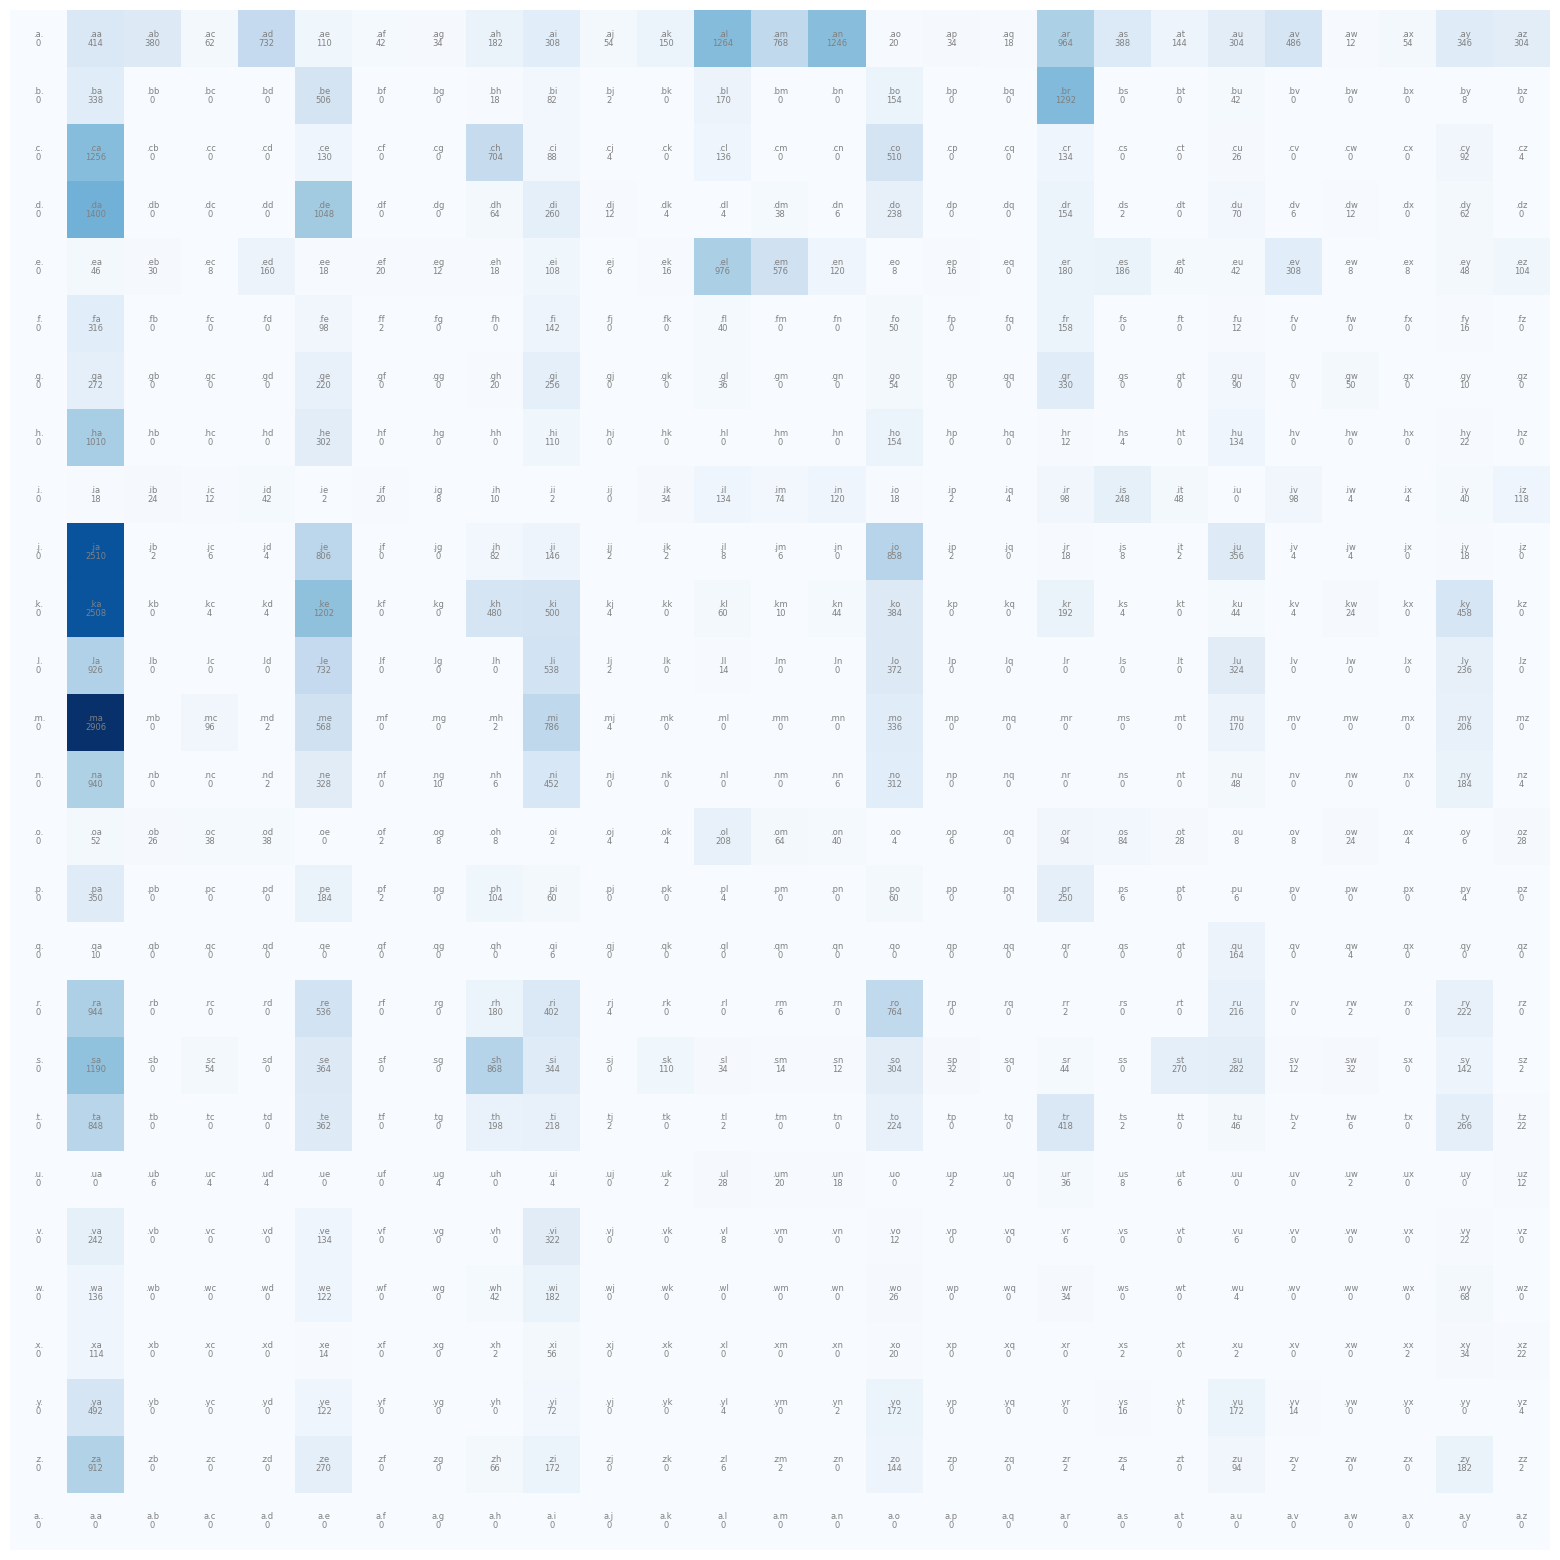

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))  # 减小图像大小以便于查看
plt.imshow(N[:27, :27], cmap='Blues')  # 只显示前 27x27 的内容
for i in range(27):
    for j in range(27):
        chstr = itopair[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray', fontsize=6)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray', fontsize=6)
plt.axis('off');

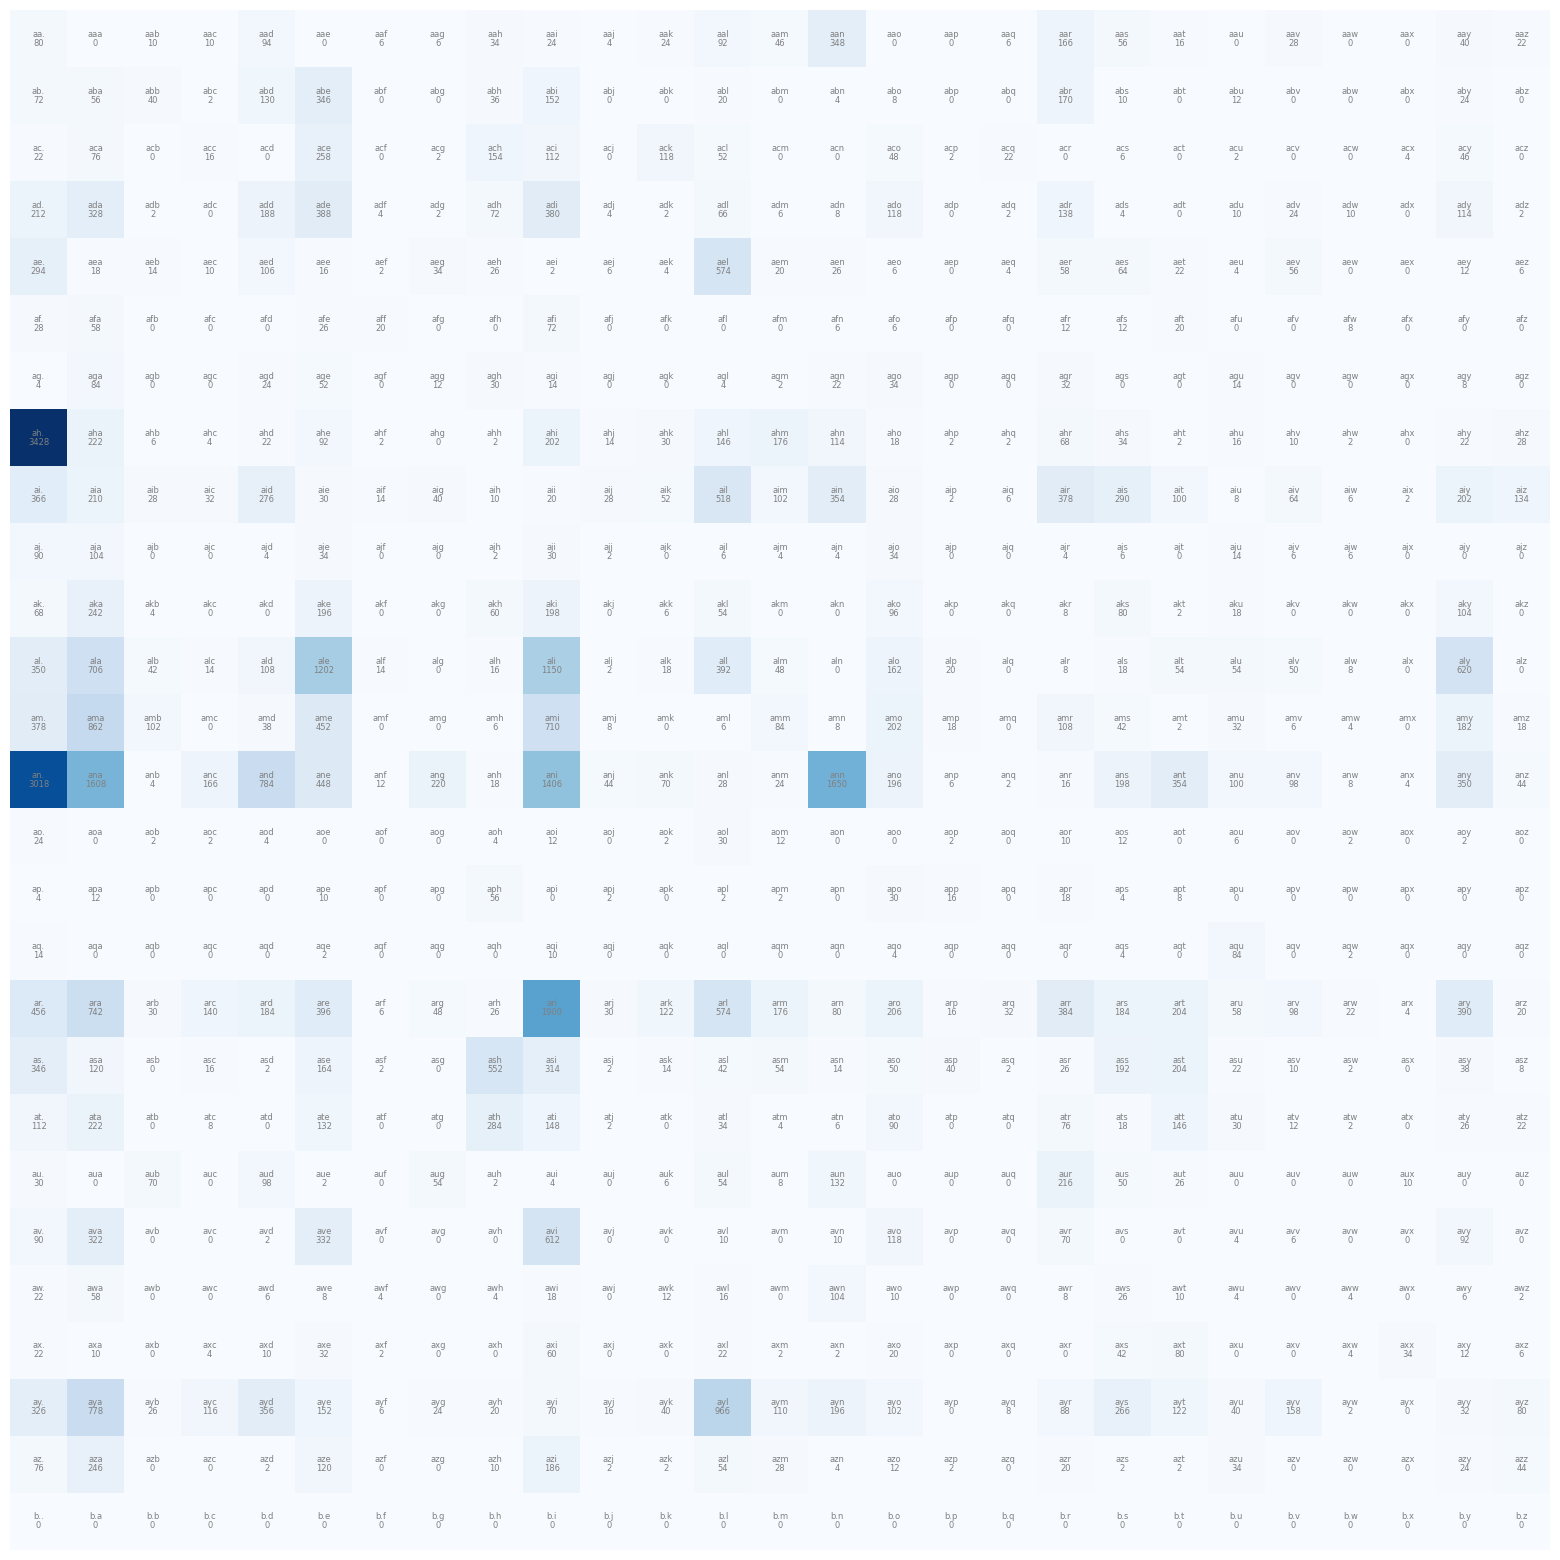

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(N[27:54, :27], cmap='Blues')  # Display rows 27:54 and columns 0:27
for i in range(27, 54):
    for j in range(27):
        chstr = itopair[i] + itos[j]
        plt.text(j, i-27, chstr, ha="center", va="bottom", color='gray', fontsize=6)
        plt.text(j, i-27, N[i, j].item(), ha="center", va="top", color='gray', fontsize=6)
plt.axis('off');

In [23]:
N[0]

tensor([   0,  414,  380,   62,  732,  110,   42,   34,  182,  308,   54,  150,
        1264,  768, 1246,   20,   34,   18,  964,  388,  144,  304,  486,   12,
          54,  346,  304], dtype=torch.int32)